# Iris data set

In [84]:
import matplotlib.pyplot as plt

In [85]:
%matplotlib inline

In [86]:
from sklearn import datasets

In [87]:
data = datasets.load_iris()

In [88]:
data.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [89]:
iris = data.data #features

In [90]:
target = data.target  #label

In [91]:
features = data.feature_names #feature names

In [92]:
from sklearn.model_selection import train_test_split

In [93]:
X_train, X_test, y_train, y_test = train_test_split(iris, target, test_size=0.2, random_state=1)

In [94]:
len(X_test)

30

In [95]:
import tensorflow as tf
from tensorflow import keras

In [22]:
X_train

array([[6.1, 3. , 4.6, 1.4],
       [7.7, 3. , 6.1, 2.3],
       [5.6, 2.5, 3.9, 1.1],
       [6.4, 2.8, 5.6, 2.1],
       [5.8, 2.8, 5.1, 2.4],
       [5.3, 3.7, 1.5, 0.2],
       [5.5, 2.3, 4. , 1.3],
       [5.2, 3.4, 1.4, 0.2],
       [6.5, 2.8, 4.6, 1.5],
       [6.7, 2.5, 5.8, 1.8],
       [6.8, 3. , 5.5, 2.1],
       [5.1, 3.5, 1.4, 0.3],
       [6. , 2.2, 5. , 1.5],
       [6.3, 2.9, 5.6, 1.8],
       [6.6, 2.9, 4.6, 1.3],
       [7.7, 2.6, 6.9, 2.3],
       [5.7, 3.8, 1.7, 0.3],
       [5. , 3.6, 1.4, 0.2],
       [4.8, 3. , 1.4, 0.3],
       [5.2, 2.7, 3.9, 1.4],
       [5.1, 3.4, 1.5, 0.2],
       [5.5, 3.5, 1.3, 0.2],
       [7.7, 3.8, 6.7, 2.2],
       [6.9, 3.1, 5.4, 2.1],
       [7.3, 2.9, 6.3, 1.8],
       [6.4, 2.8, 5.6, 2.2],
       [6.2, 2.8, 4.8, 1.8],
       [6. , 3.4, 4.5, 1.6],
       [7.7, 2.8, 6.7, 2. ],
       [5.7, 3. , 4.2, 1.2],
       [4.8, 3.4, 1.6, 0.2],
       [5.7, 2.5, 5. , 2. ],
       [6.3, 2.7, 4.9, 1.8],
       [4.8, 3. , 1.4, 0.1],
       [4.7, 3

In [23]:
y_train

array([1, 2, 1, 2, 2, 0, 1, 0, 1, 2, 2, 0, 2, 2, 1, 2, 0, 0, 0, 1, 0, 0,
       2, 2, 2, 2, 2, 1, 2, 1, 0, 2, 2, 0, 0, 2, 0, 2, 2, 1, 1, 2, 2, 0,
       1, 1, 2, 1, 2, 1, 0, 0, 0, 2, 0, 1, 2, 2, 0, 0, 1, 0, 2, 1, 2, 2,
       1, 2, 2, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 2, 2, 2, 0, 0, 1, 0, 2, 0,
       2, 2, 0, 2, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 2, 0,
       0, 2, 1, 2, 1, 2, 2, 1, 2, 0])

In [96]:
from sklearn.preprocessing import MinMaxScaler

In [97]:
scaler = MinMaxScaler()

In [98]:
X_train = scaler.fit_transform(X_train)

In [99]:
X_test = scaler.fit_transform(X_test)

In [108]:
model = tf.keras.Sequential([
    tf.keras.layers.InputLayer(input_shape=(4,)),
    keras.layers.Dense(units=20, activation='relu'),
    keras.layers.Dense(units=20, activation='relu'),
    keras.layers.Dense(units=3, activation='softmax')
    ])

In [109]:
model.compile(optimizer=tf.keras.optimizers.SGD(learning_rate=0.1), 
              loss=tf.losses.CategoricalCrossentropy(),
              metrics=['accuracy'])

In [102]:
x_train, x_val, Y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=1)

In [103]:
y_train_oh = tf.one_hot(Y_train,3)
y_test_oh = tf.one_hot(y_test,3)
y_val_oh = tf.one_hot(y_val,3)

In [110]:
history = model.fit(
    x_train,
    y_train_oh,
    batch_size=64,
    epochs=500,
    # We pass some validation for
    # monitoring validation loss and metrics
    # at the end of each epoch
    validation_data=(x_val, y_val_oh),
)

Epoch 1/500
2/2 [==============================] - 1s 523ms/step - loss: 1.1070 - accuracy: 0.2812 - val_loss: 1.0993 - val_accuracy: 0.3333
Epoch 2/500
2/2 [==============================] - 0s 83ms/step - loss: 1.0921 - accuracy: 0.3854 - val_loss: 1.0839 - val_accuracy: 0.2500
Epoch 3/500
2/2 [==============================] - 0s 84ms/step - loss: 1.0813 - accuracy: 0.3021 - val_loss: 1.0699 - val_accuracy: 0.3750
Epoch 4/500
2/2 [==============================] - 0s 82ms/step - loss: 1.0722 - accuracy: 0.3646 - val_loss: 1.0634 - val_accuracy: 0.3750
Epoch 5/500
2/2 [==============================] - 0s 82ms/step - loss: 1.0664 - accuracy: 0.3646 - val_loss: 1.0513 - val_accuracy: 0.3750
Epoch 6/500
2/2 [==============================] - 0s 84ms/step - loss: 1.0595 - accuracy: 0.3646 - val_loss: 1.0422 - val_accuracy: 0.5417
Epoch 7/500
2/2 [==============================] - 0s 74ms/step - loss: 1.0518 - accuracy: 0.4792 - val_loss: 1.0355 - val_accuracy: 0.4167
Epoch 8/500
2/2 [==

2/2 [==============================] - 0s 88ms/step - loss: 0.1925 - accuracy: 0.9271 - val_loss: 0.1743 - val_accuracy: 0.9167
Epoch 118/500
2/2 [==============================] - 0s 59ms/step - loss: 0.1825 - accuracy: 0.9479 - val_loss: 0.1747 - val_accuracy: 0.9167
Epoch 119/500
2/2 [==============================] - 0s 67ms/step - loss: 0.1687 - accuracy: 0.9583 - val_loss: 0.1663 - val_accuracy: 0.9167
Epoch 120/500
2/2 [==============================] - 0s 59ms/step - loss: 0.1747 - accuracy: 0.9479 - val_loss: 0.1610 - val_accuracy: 0.9167
Epoch 121/500
2/2 [==============================] - 0s 62ms/step - loss: 0.1713 - accuracy: 0.9583 - val_loss: 0.1636 - val_accuracy: 0.9167
Epoch 122/500
2/2 [==============================] - 0s 68ms/step - loss: 0.1704 - accuracy: 0.9583 - val_loss: 0.1599 - val_accuracy: 0.9167
Epoch 123/500
2/2 [==============================] - 0s 64ms/step - loss: 0.1669 - accuracy: 0.9479 - val_loss: 0.1573 - val_accuracy: 0.9167
Epoch 124/500
2/2 [=

Epoch 175/500
2/2 [==============================] - 0s 70ms/step - loss: 0.1066 - accuracy: 0.9792 - val_loss: 0.1108 - val_accuracy: 1.0000
Epoch 176/500
2/2 [==============================] - 0s 62ms/step - loss: 0.1101 - accuracy: 0.9583 - val_loss: 0.1185 - val_accuracy: 0.9167
Epoch 177/500
2/2 [==============================] - 0s 66ms/step - loss: 0.0922 - accuracy: 0.9896 - val_loss: 0.1090 - val_accuracy: 0.9167
Epoch 178/500
2/2 [==============================] - 0s 69ms/step - loss: 0.0944 - accuracy: 0.9792 - val_loss: 0.1168 - val_accuracy: 0.9167
Epoch 179/500
2/2 [==============================] - 0s 70ms/step - loss: 0.0911 - accuracy: 0.9792 - val_loss: 0.1454 - val_accuracy: 0.9167
Epoch 180/500
2/2 [==============================] - 0s 65ms/step - loss: 0.0913 - accuracy: 0.9792 - val_loss: 0.1061 - val_accuracy: 0.9167
Epoch 181/500
2/2 [==============================] - 0s 71ms/step - loss: 0.0962 - accuracy: 0.9688 - val_loss: 0.1200 - val_accuracy: 0.9167
Epoch 

Epoch 233/500
2/2 [==============================] - 0s 73ms/step - loss: 0.0690 - accuracy: 0.9792 - val_loss: 0.1194 - val_accuracy: 0.9167
Epoch 234/500
2/2 [==============================] - 0s 70ms/step - loss: 0.0760 - accuracy: 0.9688 - val_loss: 0.1541 - val_accuracy: 0.9167
Epoch 235/500
2/2 [==============================] - 0s 61ms/step - loss: 0.0817 - accuracy: 0.9792 - val_loss: 0.1174 - val_accuracy: 0.9167
Epoch 236/500
2/2 [==============================] - 0s 70ms/step - loss: 0.0716 - accuracy: 0.9792 - val_loss: 0.1441 - val_accuracy: 0.9167
Epoch 237/500
2/2 [==============================] - 0s 57ms/step - loss: 0.0729 - accuracy: 0.9896 - val_loss: 0.1041 - val_accuracy: 0.9167
Epoch 238/500
2/2 [==============================] - 0s 66ms/step - loss: 0.0698 - accuracy: 0.9896 - val_loss: 0.0950 - val_accuracy: 0.9167
Epoch 239/500
2/2 [==============================] - 0s 62ms/step - loss: 0.0877 - accuracy: 0.9688 - val_loss: 0.1004 - val_accuracy: 0.9583
Epoch 

Epoch 291/500
2/2 [==============================] - 0s 61ms/step - loss: 0.0614 - accuracy: 0.9792 - val_loss: 0.0865 - val_accuracy: 0.9167
Epoch 292/500
2/2 [==============================] - 0s 75ms/step - loss: 0.0635 - accuracy: 0.9792 - val_loss: 0.1673 - val_accuracy: 0.9167
Epoch 293/500
2/2 [==============================] - 0s 68ms/step - loss: 0.0858 - accuracy: 0.9688 - val_loss: 0.1206 - val_accuracy: 0.9167
Epoch 294/500
2/2 [==============================] - 0s 66ms/step - loss: 0.0632 - accuracy: 0.9792 - val_loss: 0.1178 - val_accuracy: 0.9167
Epoch 295/500
2/2 [==============================] - 0s 59ms/step - loss: 0.0606 - accuracy: 0.9792 - val_loss: 0.0997 - val_accuracy: 0.9167
Epoch 296/500
2/2 [==============================] - 0s 60ms/step - loss: 0.0639 - accuracy: 0.9896 - val_loss: 0.0832 - val_accuracy: 0.9583
Epoch 297/500
2/2 [==============================] - 0s 59ms/step - loss: 0.0637 - accuracy: 0.9792 - val_loss: 0.1046 - val_accuracy: 0.9167
Epoch 

Epoch 349/500
2/2 [==============================] - 0s 63ms/step - loss: 0.0601 - accuracy: 0.9792 - val_loss: 0.1799 - val_accuracy: 0.9167
Epoch 350/500
2/2 [==============================] - 0s 58ms/step - loss: 0.0748 - accuracy: 0.9792 - val_loss: 0.1226 - val_accuracy: 0.9167
Epoch 351/500
2/2 [==============================] - 0s 73ms/step - loss: 0.0572 - accuracy: 0.9688 - val_loss: 0.1008 - val_accuracy: 0.9167
Epoch 352/500
2/2 [==============================] - 0s 63ms/step - loss: 0.0575 - accuracy: 0.9792 - val_loss: 0.1335 - val_accuracy: 0.9167
Epoch 353/500
2/2 [==============================] - 0s 65ms/step - loss: 0.0600 - accuracy: 0.9688 - val_loss: 0.1148 - val_accuracy: 0.9167
Epoch 354/500
2/2 [==============================] - 0s 68ms/step - loss: 0.0752 - accuracy: 0.9688 - val_loss: 0.2442 - val_accuracy: 0.9167
Epoch 355/500
2/2 [==============================] - 0s 67ms/step - loss: 0.1118 - accuracy: 0.9792 - val_loss: 0.1309 - val_accuracy: 0.9167
Epoch 

Epoch 407/500
2/2 [==============================] - 0s 61ms/step - loss: 0.0595 - accuracy: 0.9792 - val_loss: 0.1962 - val_accuracy: 0.9167
Epoch 408/500
2/2 [==============================] - 0s 67ms/step - loss: 0.0745 - accuracy: 0.9792 - val_loss: 0.1108 - val_accuracy: 0.9167
Epoch 409/500
2/2 [==============================] - 0s 61ms/step - loss: 0.0545 - accuracy: 0.9792 - val_loss: 0.0857 - val_accuracy: 0.9167
Epoch 410/500
2/2 [==============================] - 0s 74ms/step - loss: 0.0644 - accuracy: 0.9688 - val_loss: 0.0714 - val_accuracy: 1.0000
Epoch 411/500
2/2 [==============================] - 0s 67ms/step - loss: 0.0735 - accuracy: 0.9688 - val_loss: 0.1261 - val_accuracy: 0.9167
Epoch 412/500
2/2 [==============================] - 0s 65ms/step - loss: 0.0555 - accuracy: 0.9896 - val_loss: 0.1074 - val_accuracy: 0.9167
Epoch 413/500
2/2 [==============================] - 0s 68ms/step - loss: 0.0547 - accuracy: 0.9688 - val_loss: 0.1187 - val_accuracy: 0.9167
Epoch 

Epoch 465/500
2/2 [==============================] - 0s 59ms/step - loss: 0.0683 - accuracy: 0.9583 - val_loss: 0.0784 - val_accuracy: 0.9167
Epoch 466/500
2/2 [==============================] - 0s 62ms/step - loss: 0.0545 - accuracy: 0.9792 - val_loss: 0.1327 - val_accuracy: 0.9167
Epoch 467/500
2/2 [==============================] - 0s 59ms/step - loss: 0.0544 - accuracy: 0.9688 - val_loss: 0.1013 - val_accuracy: 0.9167
Epoch 468/500
2/2 [==============================] - 0s 59ms/step - loss: 0.0547 - accuracy: 0.9792 - val_loss: 0.0751 - val_accuracy: 0.9583
Epoch 469/500
2/2 [==============================] - 0s 60ms/step - loss: 0.0569 - accuracy: 0.9688 - val_loss: 0.1018 - val_accuracy: 0.9167
Epoch 470/500
2/2 [==============================] - 0s 72ms/step - loss: 0.0541 - accuracy: 0.9688 - val_loss: 0.0814 - val_accuracy: 0.9167
Epoch 471/500
2/2 [==============================] - 0s 67ms/step - loss: 0.0541 - accuracy: 0.9792 - val_loss: 0.1169 - val_accuracy: 0.9167
Epoch 

In [111]:
train_loss = history.history['loss']
val_loss = history.history['val_loss']

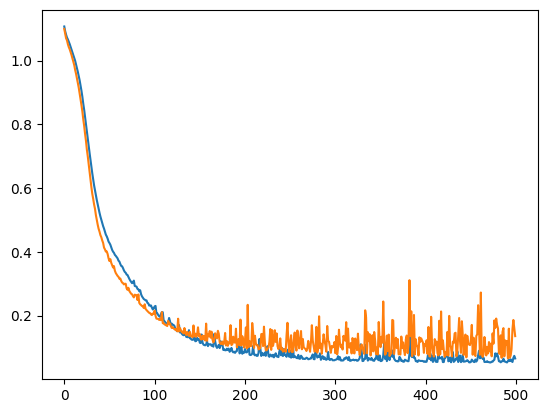

In [112]:
plt.plot(train_loss)
plt.plot(val_loss)

In [113]:
train_acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

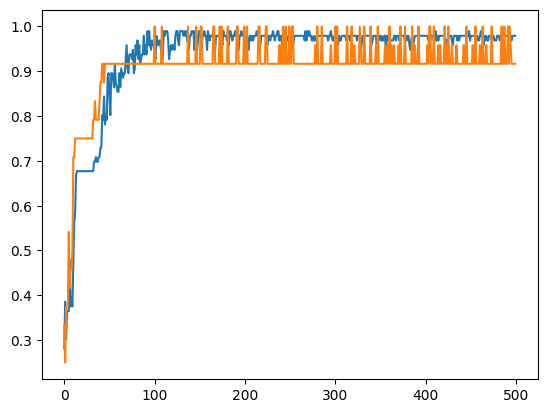

In [114]:
plt.plot(train_acc)
plt.plot(val_acc)

In [66]:
y_pred = model.predict(X_test)

1/1 [==============================] - 0s 47ms/step


In [67]:
y_pred

array([[9.9988377e-01, 1.1618083e-04, 3.1428944e-14],
       [6.2720254e-03, 9.8974401e-01, 3.9839675e-03],
       [1.7434603e-04, 8.4350300e-01, 1.5632264e-01],
       [9.9972659e-01, 2.7341940e-04, 5.2692421e-13],
       [4.8036277e-09, 1.8065994e-03, 9.9819344e-01],
       [7.5031305e-05, 5.5635095e-01, 4.4357401e-01],
       [1.6032778e-09, 1.3983488e-04, 9.9986017e-01],
       [9.9926060e-01, 7.3941826e-04, 7.4085165e-12],
       [9.9792635e-01, 2.0735827e-03, 1.8843969e-10],
       [5.7999322e-10, 7.9547222e-05, 9.9992049e-01],
       [4.4861814e-04, 6.2472302e-01, 3.7482840e-01],
       [9.9954528e-01, 4.5465078e-04, 1.5064996e-12],
       [9.8961495e-10, 1.1228602e-04, 9.9988770e-01],
       [1.5347038e-04, 8.2320249e-01, 1.7664401e-01],
       [5.2704476e-05, 2.1870066e-01, 7.8124660e-01],
       [9.9820316e-01, 1.7968676e-03, 1.8192386e-10],
       [7.8822300e-04, 8.6885154e-01, 1.3036025e-01],
       [1.1645897e-04, 3.2564688e-01, 6.7423660e-01],
       [9.9818569e-01, 1.814

In [70]:
import numpy as np

In [86]:
Y_pred = np.array(list(map(np.argmax,y_pred)))

In [87]:
Y_pred

array([0, 1, 1, 0, 2, 1, 2, 0, 0, 2, 1, 0, 2, 1, 2, 0, 1, 2, 0, 0, 1, 2,
       2, 0, 2, 1, 0, 0, 1, 2], dtype=int64)

In [88]:
y_test

array([0, 1, 1, 0, 2, 1, 2, 0, 0, 2, 1, 0, 2, 1, 1, 0, 1, 1, 0, 0, 1, 1,
       1, 0, 2, 1, 0, 0, 1, 2])

In [89]:
from sklearn.metrics import confusion_matrix, accuracy_score, recall_score, precision_score

In [90]:
confusion_matrix(Y_pred,y_test)

array([[11,  0,  0],
       [ 0,  9,  0],
       [ 0,  4,  6]], dtype=int64)

In [91]:
accuracy_score(Y_pred,y_test)

0.8666666666666667

In [93]:
recall_score(Y_pred,y_test,average='weighted')

0.8666666666666667